# PMT parameterization



In [1]:
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import random as rd
import sys

# Add the Utilties directory to the system path so the file sipm_param can be imported.
sys.path.append("../Utilities")
from pmt_s1param import *
from pmt_s2param import *

The parameterization is done in two time bins for S1 and 12 time bins for S2 and can be accessed through the functions pmt_s1par(tbin,x,y,z) defined in Utilities/pmt_s1param.py and pmt_s2par(tbin,r) defined in Utilities/pmt_s2param.py.  The S1 parameterization is done for 9 x-values (integers 0-8) and continuous values of y (from 0.0 to 217.5) and z (from 65.0 - 475.0).

## S1 parameterization

In [2]:
# Choose the x and time slices.
x = 3
tbin = 0

# Set up the grid of 2D points.
yrng = np.arange(0.0,217.5,217.5/100.)
zrng = np.arange(65.,475.,(475.-65.)/100.)
yy,zz = np.meshgrid(yrng,zrng)

# Calculate the probabilities over the grid.
pvals = np.zeros([len(yy),len(yy[0])])
rval = 0
for yl,zl in zip(yy,zz):
    cval = 0
    for y,z in zip(yl,zl):
        pvals[rval][cval] = pmt_s1par(tbin,x,y,z)
        cval += 1
    rval += 1

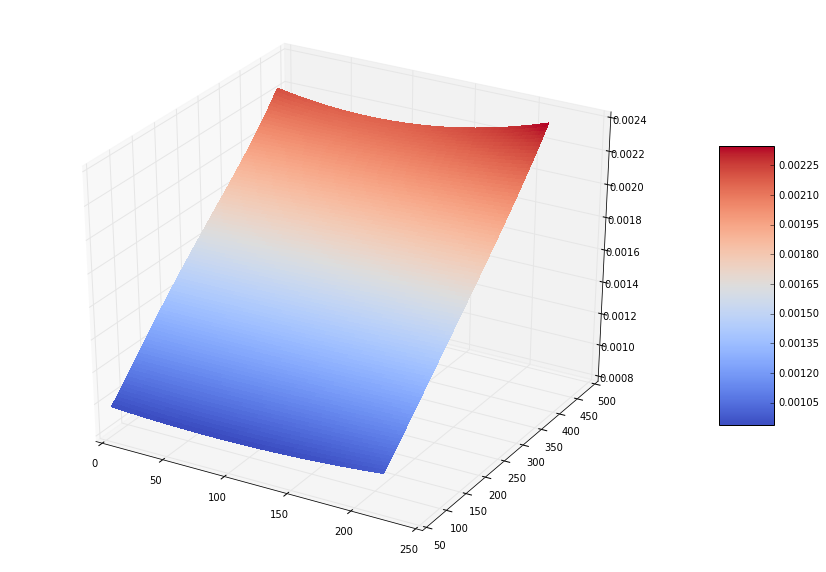

In [3]:
# Plot a 2D surface plot of the detection probabilities.
fig = plt.figure()
fig.set_figwidth(15.0)
fig.set_figheight(10.0)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(yy, zz, pvals, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## S2 parameterization

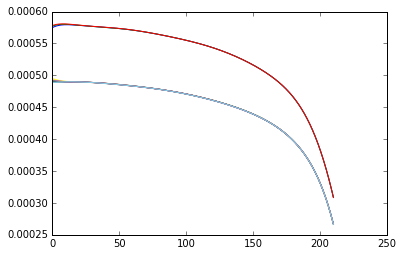

In [4]:
# Plot the PMT response out to r = 210
rr = np.arange(0, 210, 0.01)

# Plot the responses with different colors.
colors = ['blue','green','red','yellow','orange','magenta','cyan','brown','black','violet','gray','skyblue']
for tbin in range(12):
    pvals = pmt_s2par(tbin, rr)
    plt.plot(rr, pvals, color=colors[tbin], lw=1, label='Time bin {0}'.format(tbin))

#lnd = plt.legend(loc=1,frameon=False,handletextpad=0);
plt.show()